# Preparing Time Series from Wide-Form Data
Brittany Lassiter

**I will be working with Zillow's publicly available Zillow House Value Index (ZHVI)**

## Objectives

- Prepare the dataset for time series analysis
- Prepared the dataframe with the time series data for the 4 largest cities
- Answer the questions using pandas

# Part 1: Import and prepare Data

## Imports 

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import seaborn as sns

url ="Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month - City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
df = pd.read_csv(url)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


## Filtering 4 largest cities

In [94]:
filter_df_0 = df["SizeRank"] >=0
filter_df_3 = df["SizeRank"] <= 3 

larger4_df = df[filter_df_0 & filter_df_3]
larger4_df["SizeRank"].value_counts()

0    1
1    1
2    1
3    1
Name: SizeRank, dtype: int64

In [95]:
larger4_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


## Melt the data to long-form and prepare it for time series analysis

In [96]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [97]:
#Melting wide form into long form
larger4_df = pd.melt(larger4_df.drop(columns = ["RegionID", "SizeRank", "RegionType", "StateName",
                                         "State", "Metro", "CountyName"]), id_vars=["RegionName"],
                  value_name="Value",var_name="Date")
larger4_df

,RegionName,Date,Value
0,New York,2000-01-31,253690.0
1,Los Angeles,2000-01-31,234181.0
2,Houston,2000-01-31,109068.0
3,Chicago,2000-01-31,166139.0
4,New York,2000-02-29,255517.0
...,...,...,...
1087,Chicago,2022-08-31,315587.0
1088,New York,2022-09-30,781622.0
1089,Los Angeles,2022-09-30,966595.0
1090,Houston,2022-09-30,272639.0


In [98]:
larger4_df["Date"] = pd.to_datetime(larger4_df["Date"])

In [99]:
#Setting date as index
larger4_df = larger4_df.set_index("Date")
larger4_df.head()

,RegionName,Value
Date,,
2000-01-31,New York,253690.0
2000-01-31,Los Angeles,234181.0
2000-01-31,Houston,109068.0
2000-01-31,Chicago,166139.0
2000-02-29,New York,255517.0


In [100]:
larger4_df = larger4_df.groupby("RegionName").resample("MS").sum()
larger4_df

C:\Users\blass\AppData\Local\Temp\ipykernel_4464\3354099590.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  larger4_df = larger4_df.groupby("RegionName").resample("MS").sum()


Value
RegionName Date                
Chicago    2000-01-01  166139.0
           2000-02-01  166536.0
           2000-03-01  167368.0
           2000-04-01  168826.0
           2000-05-01  170499.0
...                         ...
New York   2022-05-01  768797.0
           2022-06-01  773944.0
           2022-07-01  777692.0
           2022-08-01  779960.0
           2022-09-01  781622.0

[1092 rows x 1 columns]

## Part 2: Prepare data and Answer Questions

In [101]:
unstacked = larger4_df.unstack(level=0)
unstacked

Value                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-01  166139.0  109068.0    234181.0  253690.0
2000-02-01  166536.0  109079.0    234401.0  255517.0
2000-03-01  167368.0  108878.0    235513.0  257207.0
2000-04-01  168826.0  108881.0    237589.0  260310.0
2000-05-01  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-01  312487.0  265558.0    990391.0  768797.0
2022-06-01  314663.0  268901.0    992337.0  773944.0
2022-07-01  315910.0  271059.0    992630.0  777692.0
2022-08-01  315587.0  272400.0    978196.0  779960.0
2022-09-01  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

## **Q1: Which City had the highest Typical Home Value at the end of 2008? Which had the least?**

In [102]:
def thousands(x, pos):
    return '$%1.1fK' % (x*1e-3)

Text(0.5, 0, 'Year')

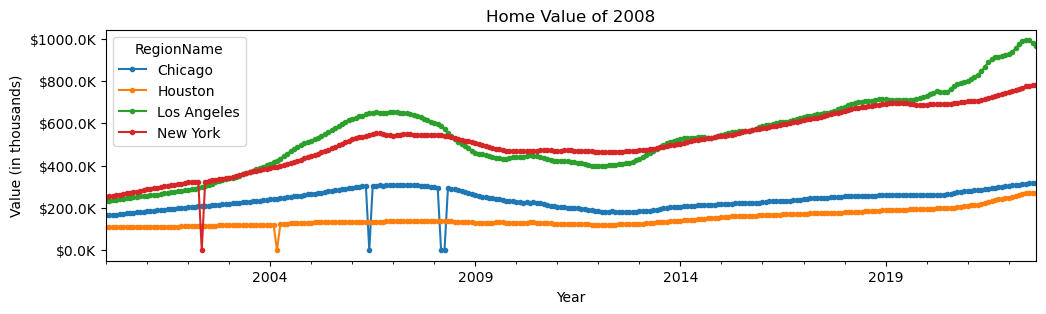

In [103]:
fig, ax = plt.subplots(figsize = (12,3))
ax = unstacked["Value"].plot(ax = ax, marker = ".")

ax.yaxis.set_major_formatter(FuncFormatter(thousands))

ax.set_title("Home Value of 2008")
ax.set_ylabel("Value (in thousands)")
ax.set_xlabel("Year")

In [104]:
df_2008 = unstacked.copy()
df_2008.loc["2008-12"]

Value                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2008-12-01  265306.0  131283.0    469294.0  510309.0

**-The highest typical home value was New York for 510309.00. The lowest home value was Houston for about 131283.00.**

## Q2: How much did the home values change from November 2008 to December 2008 (in dollars)?

In [105]:
df_diff = unstacked.copy()df_diff = df_diff.loc["2008"]
df_diff.diff()

Value                             
RegionName   Chicago Houston Los Angeles New York
Date                                             
2008-01-01       NaN     NaN         NaN      NaN
2008-02-01   -4144.0  -696.0     -6394.0   -440.0
2008-03-01 -296063.0  -717.0    -10570.0  -1536.0
2008-04-01       0.0  -167.0    -14839.0  -2697.0
2008-05-01  293467.0  -400.0    -16637.0  -4180.0
2008-06-01   -4972.0  -455.0    -14967.0  -3875.0
2008-07-01    -321.0  -381.0    -15402.0  -4599.0
2008-08-01   -4975.0  -622.0    -13700.0  -3921.0
2008-09-01   -2504.0  -838.0    -10396.0  -3943.0
2008-10-01   -5846.0  -743.0     -9145.0  -3299.0
2008-11-01   -3790.0  -942.0     -9074.0  -3281.0
2008-12-01   -5753.0  -964.0    -12611.0  -4458.0

**-All markets have decresses in value. Chicago's difference was by 5753, Houston differnece was by 964, LA difference was by 12611, and NY difference was by 4458.**

# Part 2: Gridsearch SARIMA

## Objectives

- The overall goal is to forecast the home values for the city with the highest home value in 2008(New York) 6months into the future (beyond the dataset).

In [106]:
import statsmodels.tsa.api as tsa
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs, nsdiffs
# set random seed
SEED = 321
np.random.seed(SEED)

## Custom functions

In [107]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

In [109]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [110]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)



    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()
    
    return fig

In [111]:
dfabove_2018 = df.copy()
dfabove_2018

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


In [112]:
#Melting wide form into long form
dfabove_2018 = pd.melt(dfabove_2018.drop(columns = ["RegionID", "SizeRank", "RegionType", "StateName",
                                         "State", "Metro", "CountyName", "RegionName"]),
                  value_name="Value",var_name="Date")
dfabove_2018

,Date,Value
0,2000-01-31,253690.0
1,2000-01-31,234181.0
2,2000-01-31,109068.0
3,2000-01-31,166139.0
4,2000-01-31,114794.0
...,...,...
6133486,2022-09-30,192110.0
6133487,2022-09-30,264685.0
6133488,2022-09-30,142438.0
6133489,2022-09-30,266255.0


In [113]:
dfabove_2018['Date'] = pd.to_datetime(dfabove_2018['Date'], format='%Y-%m-%d')
dfabove_2018.dtypes

Date     datetime64[ns]
Value           float64
dtype: object

In [114]:
dfabove_2018 = dfabove_2018.set_index("Date")
dfabove_2018.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-01-31', '2000-01-31',
               ...
               '2022-09-30', '2022-09-30', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=6133491, freq=None)

In [115]:
dfabove_2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6133491 entries, 2000-01-31 to 2022-09-30
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Value   float64
dtypes: float64(1)
memory usage: 93.6 MB


In [116]:
# Define the time series as ts
ts = dfabove_2018['Value'].copy()

In [117]:
# Resample to monthly
ts = ts.resample("M").mean()
ts.head()

Date
2000-01-31    155557.348235
2000-02-29    155821.131998
2000-03-31    156227.676120
2000-04-30    157245.869665
2000-05-31    158206.816136
Freq: M, Name: Value, dtype: float64

In [123]:
ts = ts.loc['2018':]

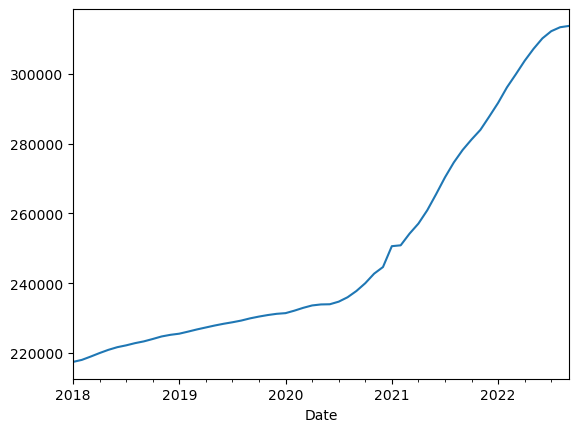

In [125]:
ts.plot();

In [126]:
ts.isna().sum()

0

## Check for Seasonality

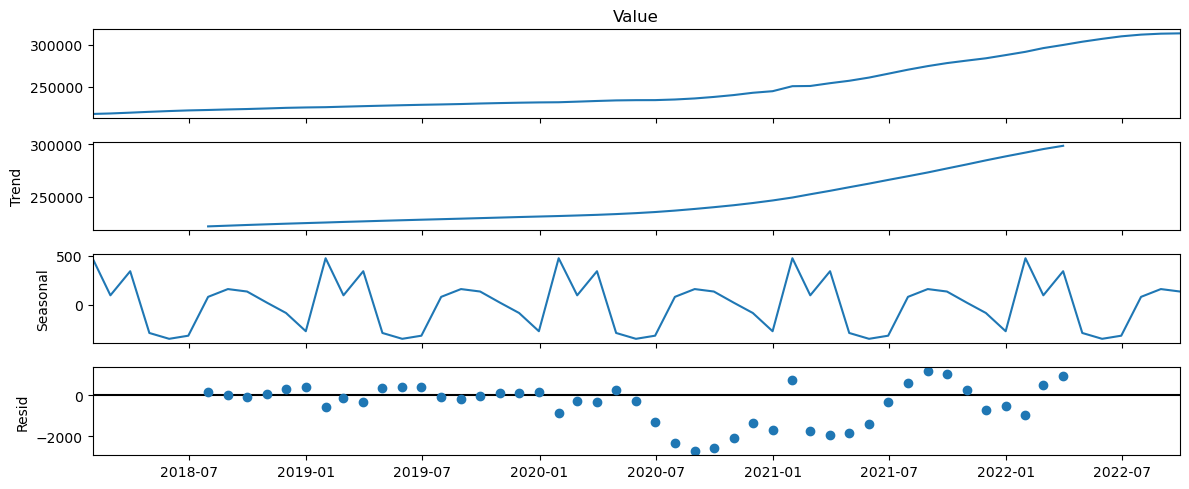

In [129]:
# Apply seasonal decomposition
decomp = tsa.seasonal_decompose(ts)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout();

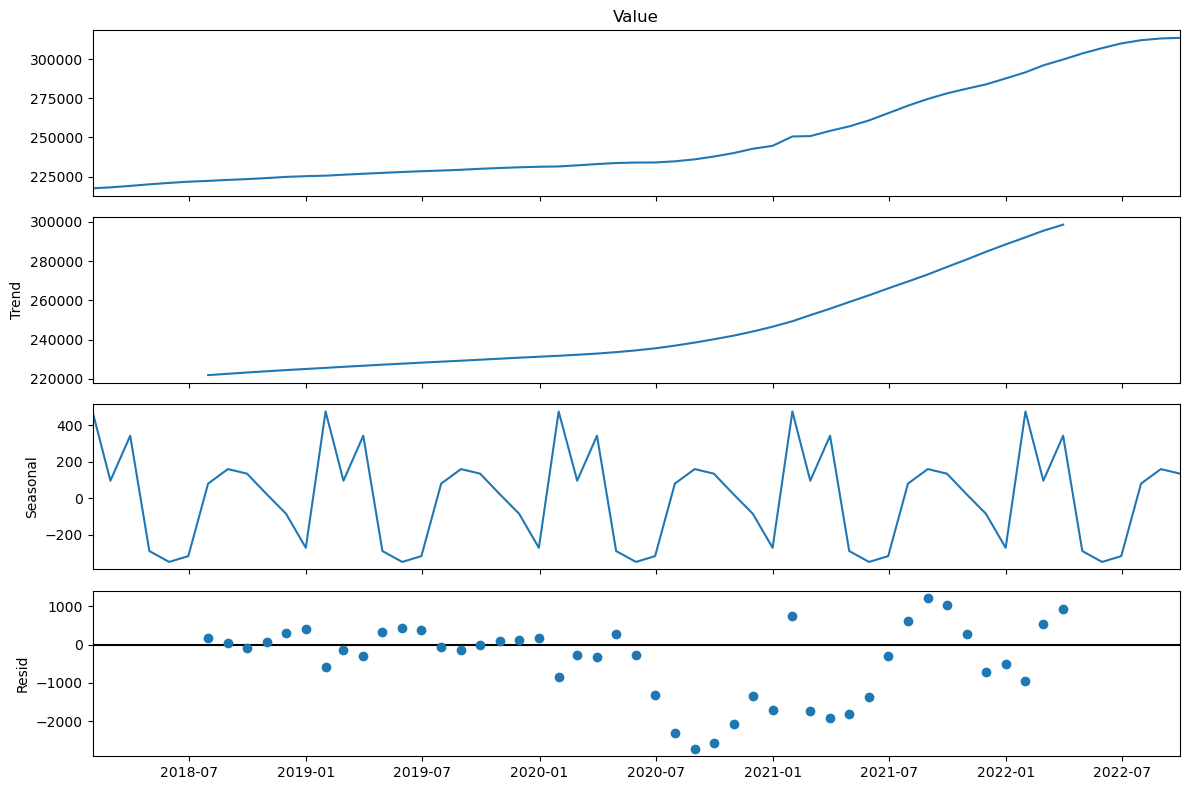

In [135]:
decomp = tsa.seasonal_decompose(ts)
fig = decomp.plot()
fig.set_size_inches(12,8)
fig.tight_layout()

In [137]:
decomp.seasonal.max(), decomp.seasonal.min()

(475.18444983195917, -348.6401952500948)

In [139]:
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

print(f"The seasonal component is {seasonal_delta: .2f} which is ~{seasonal_delta/(ts.max()-ts.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is  823.82 which is ~0.86% of the variation in time series.


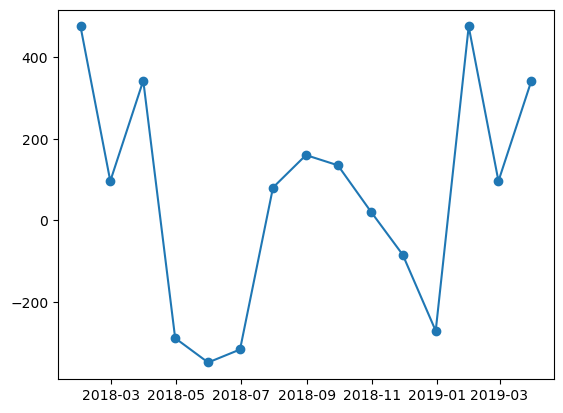

In [145]:
seasonal = decomp.seasonal
plt.plot(seasonal.head(15), marker='o')

## Difference needed for Stationary

In [146]:
# Testing the raw data for stationarity
get_adfuller_results(ts)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-1.213933,2,54,0.667574,0.05,False


In [147]:
# use ndiffs to determine differencing
d = ndiffs(ts)
d

2

In [148]:
# Determine D
D = nsdiffs(ts, m=12)
D

0

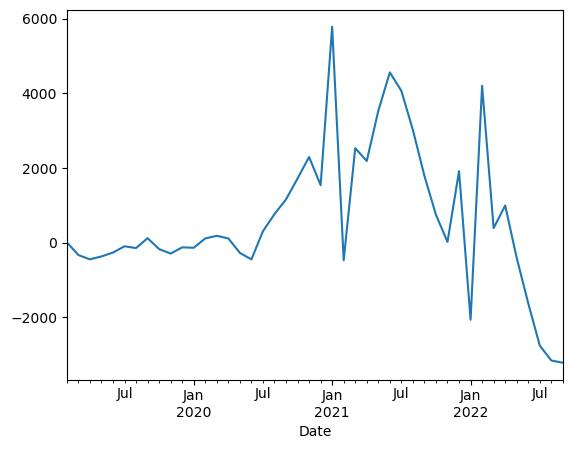

In [152]:
# apply both differencings
ts_diff = ts.diff().diff(12).dropna()
ts_diff.plot();

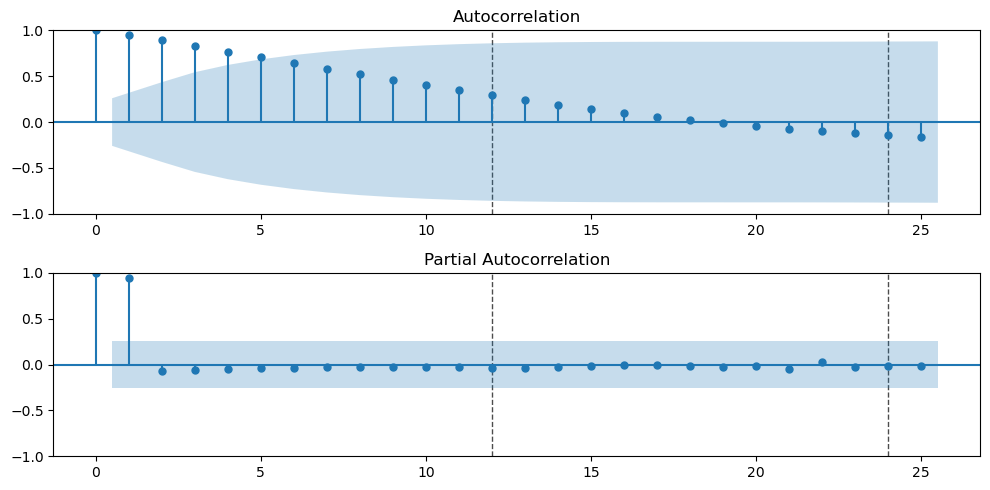

In [160]:
# We can use our function to highlight the seasonal lags by adding the arguments
plot_acf_pacf(ts, annotate_seas=True, m = 12, nlags = 25);

## Split the time series into training and test data

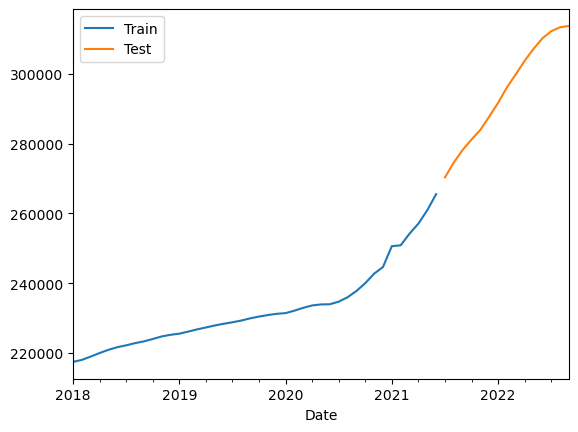

In [161]:
# tts
train, test = train_test_split(ts, test_size=.25)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

In [163]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 2  # nonseasonal differencing
q = 0  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 1  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

# Obtain summary
sarima.summary()

C:\Users\blass\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Value   No. Observations:                   42
Model:             ARIMA(1, 2, 0)x(1, 1, [1], 12)   Log Likelihood                -240.346
Date:                            Thu, 30 Nov 2023   AIC                            488.691
Time:                                    16:14:36   BIC                            494.020
Sample:                                01-31-2018   HQIC                           490.321
                                     - 06-30-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0064      0.078     -0.083      0.934      -0.159       0.146
ar.S.L12       0.8522      0.014     58.801      0.000       0.824       0.881
ma.S.L12      -1.0000      0.208     -4.808      0.000      -1.408      -0.592
sigma2      1.594e+06    1.3e-07   1.22e+13      0.000    1.59e+06    1.59e+06
===================================================================================
Ljung-Box (L1) (Q):                  12.33   Jarque-Bera (JB):                 5.36
Prob(Q):                              0.00   Prob(JB):                         0.07
Heteroskedasticity (H):             113.95   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.12e+28. Standard errors may be unstable.
"""

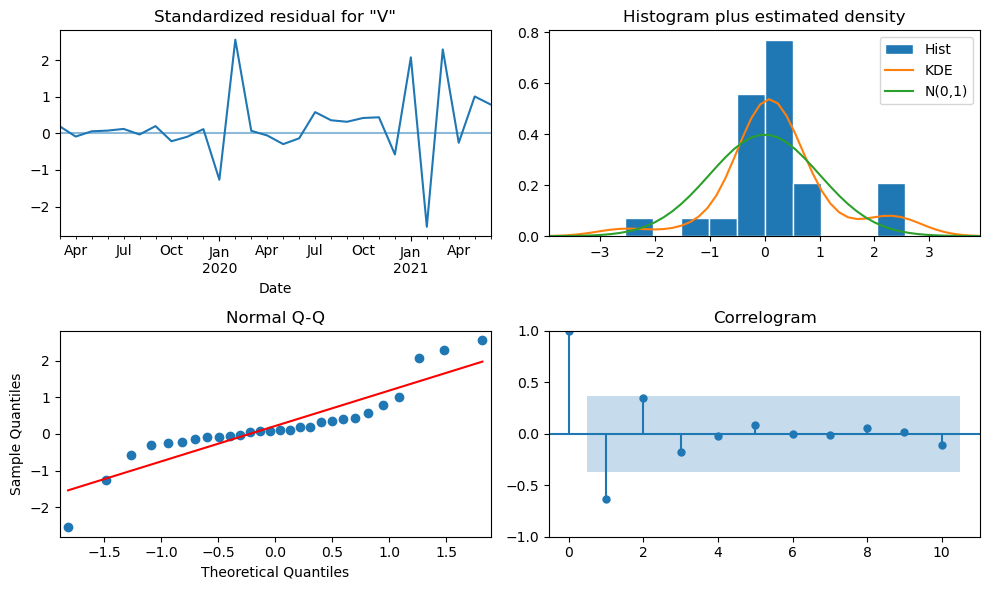

In [164]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 22,916.151
- MSE = 782,968,033.745
- RMSE = 27,981.566
- R^2 = -2.732
- MAPE = 7.53%


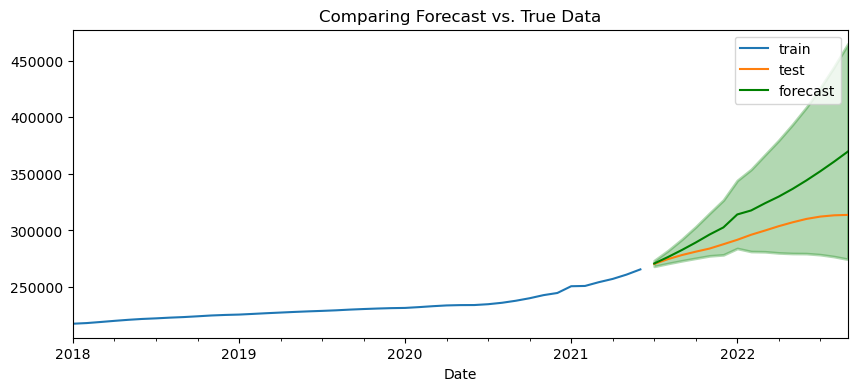

In [165]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = sarima.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

In [166]:
import pmdarima as pm

# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=True,  
    m=12,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=706.946, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=687.041, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=690.583, Time=0.07 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=693.061, Time=0.04 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=688.972, Time=0.05 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=688.971, Time=0.05 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=688.653, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=691.163, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=700.726, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=688.786, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 0.754 seconds


In [167]:
# the auto_arima will store our best nonseasonal and seasonal orders separtely
print(auto_model.order)
print(auto_model.seasonal_order)

(0, 2, 0)
(0, 0, 0, 12)


In [168]:
# Obtain summary of the best model from auto_arima
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   42
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -342.521
Date:                Thu, 30 Nov 2023   AIC                            687.041
Time:                        16:35:08   BIC                            688.730
Sample:                    01-31-2018   HQIC                           687.652
                         - 06-30-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        1.6e+06   1.39e+05     11.487      0.000    1.33e+06    1.87e+06
===================================================================================
Ljung-Box (L1) (Q):                  21.91   Jarque-Bera (JB):               240.46
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             142.08   Skew:                            -1.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

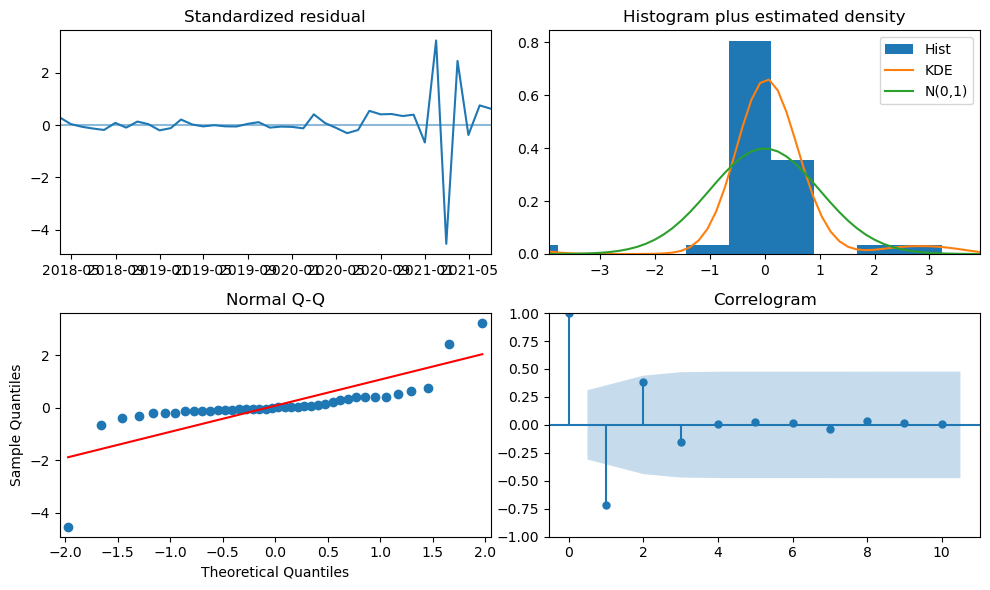

In [173]:
# Obtain diagnostic plots
fig = auto_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 7,544.097
- MSE = 90,439,608.790
- RMSE = 9,509.974
- R^2 = 0.569
- MAPE = 2.48%


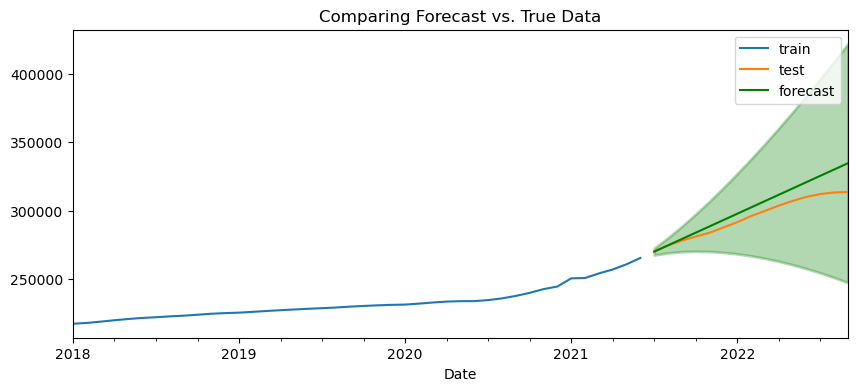

In [174]:
# Use auto_arima parameters to fit an ARIMA
auto_model = tsa.ARIMA(
    train, order=auto_model.order, seasonal_order=auto_model.seasonal_order
).fit()


# Obtain forecast as a dataframe with confidence intervals
forecast_df = auto_model.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

>The predicted home value in New York City 6 months into the future seems to rise above the 300,000 range.

>The percent change in home values in New York City by the end of the 6-month forecast about 56.9%. 